In [1]:
import itertools
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
copy_data = pd.read_csv('municipality_bus_utilization.csv', index_col="timestamp", parse_dates=True)

In [5]:
copy_data.head()

,municipality_id,usage,total_capacity
timestamp,,,
2017-06-04 07:59:42,9,454,1332
2017-06-04 07:59:42,8,556,2947
2017-06-04 07:59:42,4,1090,3893
2017-06-04 07:59:42,0,204,2813
2017-06-04 07:59:42,7,718,2019


In [6]:
df= pd.DataFrame(copy_data["usage"])

In [10]:
df.shape

(13070, 1)

In [11]:
df.isnull().sum()

usage    0
dtype: int64

In [7]:
df.head()

,usage
timestamp,
2017-06-04 07:59:42,454
2017-06-04 07:59:42,556
2017-06-04 07:59:42,1090
2017-06-04 07:59:42,204
2017-06-04 07:59:42,718


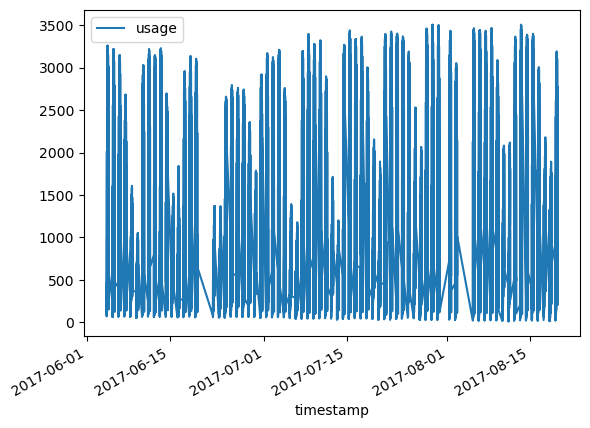

In [8]:
df[["usage"]].plot()
plt.show(block=True)

In [9]:
train = df[:10390]
test = df[10390:]

In [12]:
def ses_optimizer(train, alphas, step=48):
    best_alpha, best_mae = None, float("inf")
    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_mae = alpha, mae
        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae


In [13]:
alphas = np.arange(0.01, 1, 0.10)
best_alpha, best_mae = ses_optimizer(train, alphas, step=len(test))

alpha: 0.01 mae: 533.3961
alpha: 0.11 mae: 518.5139
alpha: 0.21 mae: 521.2913
alpha: 0.31 mae: 525.6235
alpha: 0.41 mae: 529.2462
alpha: 0.51 mae: 531.0807
alpha: 0.61 mae: 531.0417
alpha: 0.71 mae: 530.277
alpha: 0.81 mae: 530.4933
alpha: 0.91 mae: 533.7462
best_alpha: 0.11 best_mae: 518.5139


In [14]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)

In [15]:
y_pred = ses_model.forecast(7)

In [16]:
y_pred

10390   926.0099
10391   926.0099
10392   926.0099
10393   926.0099
10394   926.0099
10395   926.0099
10396   926.0099
dtype: float64

In [17]:
########################################################
# Makine Öğrenmesi ile Zaman Serisi Modeli
########################################################

In [18]:
data = pd.read_csv("municipality_bus_utilization.csv", parse_dates=True)

In [19]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [20]:
check_df(data)

##################### Shape #####################
(13070, 4)
##################### Types #####################
timestamp          object
municipality_id     int64
usage               int64
total_capacity      int64
dtype: object
##################### Head #####################
             timestamp  municipality_id  usage  total_capacity
0  2017-06-04 07:59:42                9    454            1332
1  2017-06-04 07:59:42                8    556            2947
2  2017-06-04 07:59:42                4   1090            3893
3  2017-06-04 07:59:42                0    204            2813
4  2017-06-04 07:59:42                7    718            2019
##################### Tail #####################
                 timestamp  municipality_id  usage  total_capacity
13065  2017-08-19 16:30:35                2    548             697
13066  2017-08-19 16:30:35                8   1193            2947
13067  2017-08-19 16:30:35                7   1354            2019
13068  2017-08-19 16:30:35 

In [21]:
data["timestamp"] = pd.to_datetime(data["timestamp"])
check_df(data)

##################### Shape #####################
(13070, 4)
##################### Types #####################
timestamp          datetime64[ns]
municipality_id             int64
usage                       int64
total_capacity              int64
dtype: object
##################### Head #####################
            timestamp  municipality_id  usage  total_capacity
0 2017-06-04 07:59:42                9    454            1332
1 2017-06-04 07:59:42                8    556            2947
2 2017-06-04 07:59:42                4   1090            3893
3 2017-06-04 07:59:42                0    204            2813
4 2017-06-04 07:59:42                7    718            2019
##################### Tail #####################
                timestamp  municipality_id  usage  total_capacity
13065 2017-08-19 16:30:35                2    548             697
13066 2017-08-19 16:30:35                8   1193            2947
13067 2017-08-19 16:30:35                7   1354            2019
13068

In [22]:
data.groupby(["municipality_id", "total_capacity"]).agg({"usage": ["mean","std"]})

usage         
                                    mean      std
municipality_id total_capacity                   
0               2813            550.5631 245.0418
1               397             298.0712  91.7664
2               697             486.9946 120.3850
3               1930           1078.2640 371.2121
4               3893           2306.5088 881.3793
5               587             171.4797  99.3268
6               3113           1025.8210 288.1407
7               2019           1149.2884 272.1836
8               2947           1021.7452 293.3860
9               1332            671.2938 170.7877

In [23]:
data[["municipality_id","total_capacity"]].value_counts()

municipality_id  total_capacity
0                2813              1307
1                397               1307
2                697               1307
3                1930              1307
4                3893              1307
5                587               1307
6                3113              1307
7                2019              1307
8                2947              1307
9                1332              1307
dtype: int64

In [24]:
def create_date_features(df, date_column):
    df['month'] = df[date_column].dt.month
    df['day_of_month'] = df[date_column].dt.day
    df['day_of_year'] = df[date_column].dt.dayofyear
    df['week_of_year'] = df[date_column].dt.weekofyear
    df['day_of_week'] = df[date_column].dt.dayofweek # The day of the week with Monday=0, Sunday=6.
    df['year'] = df[date_column].dt.year
    df["hour"] = df[date_column].dt.hour
    df["minute"] = df[date_column].dt.minute
    df["second"] = df[date_column].dt.second
    #df["time"] = df[date_column].dt.strftime("%H:%M:%S")
    df["is_wknd"] = df[date_column].dt.weekday // 5
    df['is_month_start'] =df[date_column].dt.is_month_start.astype(int)
    df['is_month_end'] = df[date_column].dt.is_month_end.astype(int)
    df['quarter'] = df[date_column].dt.quarter
    #df['is_quarter_start'] = df[date_column].dt.is_quarter_start.astype(int)
    #df['is_quarter_end'] = df[date_column].dt.is_quarter_end.astype(int)
    #df['is_year_start'] = df[date_column].dt.is_year_start.astype(int)
    #df['is_year_end'] = df[date_column].dt.is_year_end.astype(int)

    return df


In [25]:
data = create_date_features(data,"timestamp")

In [26]:
data.head()

,timestamp,municipality_id,usage,total_capacity,month,day_of_month,day_of_year,week_of_year,day_of_week,year,hour,minute,second,is_wknd,is_month_start,is_month_end,quarter
0,2017-06-04 07:59:42,9,454,1332,6,4,155,22,6,2017,7,59,42,1,0,0,2
1,2017-06-04 07:59:42,8,556,2947,6,4,155,22,6,2017,7,59,42,1,0,0,2
2,2017-06-04 07:59:42,4,1090,3893,6,4,155,22,6,2017,7,59,42,1,0,0,2
3,2017-06-04 07:59:42,0,204,2813,6,4,155,22,6,2017,7,59,42,1,0,0,2
4,2017-06-04 07:59:42,7,718,2019,6,4,155,22,6,2017,7,59,42,1,0,0,2


In [27]:
data.groupby(["municipality_id", "day_of_week"]).agg({"usage": "mean", "total_capacity": "mean"})

usage  total_capacity
municipality_id day_of_week                         
0               0           568.7374       2813.0000
                1           557.3652       2813.0000
                2           509.0391       2813.0000
                3           593.3833       2813.0000
                4           528.7755       2813.0000
...                              ...             ...
9               2           683.0391       1332.0000
                3           665.9056       1332.0000
                4           618.9796       1332.0000
                5           647.8889       1332.0000
                6           702.4213       1332.0000

[70 rows x 2 columns]

In [28]:
data.groupby(["municipality_id", "month"]).agg({"usage": "mean", "total_capacity": "mean"})

usage  total_capacity
municipality_id month                          
0               6      531.4946       2813.0000
                7      502.4071       2813.0000
                8      664.9539       2813.0000
1               6      267.1333        397.0000
                7      299.0000        397.0000
                8      343.7500        397.0000
2               6      490.5548        697.0000
                7      462.6989        697.0000
                8      524.5461        697.0000
3               6      981.6151       1930.0000
                7     1115.7918       1930.0000
                8     1159.6842       1930.0000
4               6     2060.0452       3893.0000
                7     2385.0056       3893.0000
                8     2544.5822       3893.0000
5               6      177.9140        587.0000
                7      170.7045        587.0000
                8      163.0099        587.0000
6               6     1065.2022       3113.0000
                7      945.1301       3113.0000
                8     1108.3849       3113.0000
7               6     1132.9548       2019.0000
                7     1115.0911       2019.0000
                8     1234.7928       2019.0000
8               6      998.2366       2947.0000
                7     1023.9182       2947.0000
                8     1053.8586       2947.0000
9               6      651.4000       1332.0000
                7      661.3922       1332.0000
                8      719.2467       1332.0000

In [29]:
data.groupby(["municipality_id", "is_wknd"]).agg({"usage": "mean", "total_capacity": "mean"})

usage  total_capacity
municipality_id is_wknd                          
0               0        551.0768       2813.0000
                1        549.3772       2813.0000
1               0        295.7807        397.0000
                1        303.3595        397.0000
2               0        474.9901        697.0000
                1        514.7114        697.0000
3               0       1001.5417       1930.0000
                1       1255.4051       1930.0000
4               0       2101.4375       3893.0000
                1       2779.9899       3893.0000
5               0        178.7445        587.0000
                1        154.7063        587.0000
6               0       1012.2412       3113.0000
                1       1057.1747       3113.0000
7               0       1135.6414       2019.0000
                1       1180.7975       2019.0000
8               0        966.3871       2947.0000
                1       1149.5595       2947.0000
9               0        669.6513       1332.0000
                1        675.0861       1332.0000

In [30]:
data.groupby(["municipality_id", "day_of_month"]).agg({"usage": "mean", "total_capacity": "mean"})

usage  total_capacity
municipality_id day_of_month                         
0               1            502.6944       2813.0000
                2            506.4722       2813.0000
                3            481.6667       2813.0000
                4            470.1667       2813.0000
                5            445.9259       2813.0000
...                               ...             ...
9               26           798.6667       1332.0000
                27           715.9444       1332.0000
                28           680.6286       1332.0000
                29           709.7778       1332.0000
                30           624.8846       1332.0000

[300 rows x 2 columns]

In [31]:
######################################
# Random Noise
######################################
def random_noise(dataframe):
    return np.random.normal(scale=1.6, size=(len(dataframe),))


In [32]:
##########################################
# Lag/Shifted Features (gecikme features)
##########################################

data = data.sort_values(by=["municipality_id", "timestamp"], axis=0)

def lag_features(dataframe, lags):
    for lag in lags:
        dataframe["usage_lag_" + str(lag)] = dataframe.groupby(["municipality_id"])["usage"].\
            transform(lambda x: x.shift(lag)) + random_noise(dataframe)
    return dataframe



In [33]:
data = lag_features(data, [15, 22, 29, 45, 52, 68, 75])

check_df(data)

##################### Shape #####################
(13070, 24)
##################### Types #####################
timestamp          datetime64[ns]
municipality_id             int64
usage                       int64
total_capacity              int64
month                       int64
day_of_month                int64
day_of_year                 int64
week_of_year                int64
day_of_week                 int64
year                        int64
hour                        int64
minute                      int64
second                      int64
is_wknd                     int64
is_month_start              int32
is_month_end                int32
quarter                     int64
usage_lag_15              float64
usage_lag_22              float64
usage_lag_29              float64
usage_lag_45              float64
usage_lag_52              float64
usage_lag_68              float64
usage_lag_75              float64
dtype: object
##################### Head #####################
         

In [34]:
######################################################
# Rolling Mean Features (Hareketli Ortalama features)
######################################################

def roll_mean_features(dataframe, windows):
    for window in windows:
        dataframe['usage_roll_mean_' + str(window)] = dataframe.groupby(["municipality_id"])['usage']. \
                                                          transform(
            lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean()) + random_noise(
            dataframe)
    return dataframe


In [35]:
data = roll_mean_features(data, [15, 22, 29, 45, 52, 68, 75])

In [36]:
check_df(data)

##################### Shape #####################
(13070, 31)
##################### Types #####################
timestamp             datetime64[ns]
municipality_id                int64
usage                          int64
total_capacity                 int64
month                          int64
day_of_month                   int64
day_of_year                    int64
week_of_year                   int64
day_of_week                    int64
year                           int64
hour                           int64
minute                         int64
second                         int64
is_wknd                        int64
is_month_start                 int32
is_month_end                   int32
quarter                        int64
usage_lag_15                 float64
usage_lag_22                 float64
usage_lag_29                 float64
usage_lag_45                 float64
usage_lag_52                 float64
usage_lag_68                 float64
usage_lag_75                 float64


In [37]:
###########################################################################
# Exponentially Weighted Mean Features (Üstel Ağırlıklı Ortalama features)
###########################################################################

def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe["usage_ewm_alpha_" + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["municipality_id"])["usage"].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe


In [38]:
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags = [15, 22, 29, 45, 52, 68, 75]

data = ewm_features(data, alphas, lags)
check_df(data)

##################### Shape #####################
(13070, 66)
##################### Types #####################
timestamp                    datetime64[ns]
municipality_id                       int64
usage                                 int64
total_capacity                        int64
month                                 int64
                                  ...      
usage_ewm_alpha_05_lag_29           float64
usage_ewm_alpha_05_lag_45           float64
usage_ewm_alpha_05_lag_52           float64
usage_ewm_alpha_05_lag_68           float64
usage_ewm_alpha_05_lag_75           float64
Length: 66, dtype: object
##################### Head #####################
             timestamp  municipality_id  usage  total_capacity  month  day_of_month  day_of_year  week_of_year  day_of_week  year  hour  minute  second  is_wknd  is_month_start  is_month_end  quarter  usage_lag_15  usage_lag_22  usage_lag_29  usage_lag_45  usage_lag_52  usage_lag_68  usage_lag_75  usage_roll_mean_15  usage_roll

In [39]:
##########################
# One-Hot Encoding
##########################

data = pd.get_dummies(data, columns=["municipality_id", "day_of_week", "month"])
check_df(data)

##################### Shape #####################
(13070, 83)
##################### Types #####################
timestamp         datetime64[ns]
usage                      int64
total_capacity             int64
day_of_month               int64
day_of_year                int64
                       ...      
day_of_week_5              uint8
day_of_week_6              uint8
month_6                    uint8
month_7                    uint8
month_8                    uint8
Length: 83, dtype: object
##################### Head #####################
             timestamp  usage  total_capacity  day_of_month  day_of_year  week_of_year  year  hour  minute  second  is_wknd  is_month_start  is_month_end  quarter  usage_lag_15  usage_lag_22  usage_lag_29  usage_lag_45  usage_lag_52  usage_lag_68  usage_lag_75  usage_roll_mean_15  usage_roll_mean_22  usage_roll_mean_29  usage_roll_mean_45  usage_roll_mean_52  usage_roll_mean_68  usage_roll_mean_75  usage_ewm_alpha_095_lag_15  usage_ewm_alpha_095_

In [40]:
######################################
# Converting usage to log(1+usage)
######################################
data["usage"] = np.log1p(data["usage"].values)

check_df(data)

##################### Shape #####################
(13070, 83)
##################### Types #####################
timestamp         datetime64[ns]
usage                    float64
total_capacity             int64
day_of_month               int64
day_of_year                int64
                       ...      
day_of_week_5              uint8
day_of_week_6              uint8
month_6                    uint8
month_7                    uint8
month_8                    uint8
Length: 83, dtype: object
##################### Head #####################
             timestamp  usage  total_capacity  day_of_month  day_of_year  week_of_year  year  hour  minute  second  is_wknd  is_month_start  is_month_end  quarter  usage_lag_15  usage_lag_22  usage_lag_29  usage_lag_45  usage_lag_52  usage_lag_68  usage_lag_75  usage_roll_mean_15  usage_roll_mean_22  usage_roll_mean_29  usage_roll_mean_45  usage_roll_mean_52  usage_roll_mean_68  usage_roll_mean_75  usage_ewm_alpha_095_lag_15  usage_ewm_alpha_095_

In [41]:
#########################
# Model
#########################


In [42]:
########################
# Custom Cost Function
########################

def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val


def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'SMAPE', smape_val, False


In [43]:
########################
# Time-Based Validation Sets
########################

train = data.loc[data["timestamp"] < "2017-08-05 08:02:03", :]

val = data.loc[(data["timestamp"] >= "2017-08-05 08:02:03") & (data["timestamp"] < "2017-08-20 16:30:35"), :]


In [44]:
cols = [col for col in train.columns if col not in ["timestamp", "usage", "year", "time"]]
Y_train = train["usage"]
X_train = train[cols]

Y_val = val["usage"]
X_val = val[cols]

Y_train.shape, X_train.shape, Y_val.shape, X_val.shape

((10390,), (10390, 80), (2680,), (2680, 80))

In [45]:
########################
# LightGBM ile Zaman Serisi Modeli
########################

import lightgbm as lgb
lgb_params = {'num_leaves': 10,
              'learning_rate': 0.02,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': 0,
              'num_boost_round': 10000,
              'early_stopping_rounds': 500,
              'nthread': -1}


In [46]:
lgbtrain = lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)

lgbval = lgb.Dataset(data=X_val, label=Y_val, reference=lgbtrain, feature_name=cols)

model = lgb.train(lgb_params, lgbtrain,
                  valid_sets=[lgbtrain, lgbval],
                  num_boost_round=lgb_params["num_boost_round"],
                  early_stopping_rounds=lgb_params["early_stopping_rounds"],
                  feval=lgbm_smape,
                  verbose_eval=100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002367 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 500 rounds
[100]	training's l2: 0.0763349	training's SMAPE: 20.0274	valid_1's l2: 0.0908162	valid_1's SMAPE: 20.2641
[200]	training's l2: 0.0430645	training's SMAPE: 14.5717	valid_1's l2: 0.0562333	valid_1's SMAPE: 15.2132
[300]	training's l2: 0.0336342	training's SMAPE: 12.8544	valid_1's l2: 0.0512523	valid_1's SMAPE: 14.2333
[400]	training's l2: 0.0280043	training's SMAPE: 11.7276	valid_1's l2: 0.0494478	valid_1's SMAPE: 13.7932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	training's l2: 0.0243214	training's SMAPE: 10.9266	valid_1's l2: 0.0472611	valid_1's SMAPE: 13.3509
[600]	training's l2: 0.0214667	training's SMAPE: 10.2813	valid_1's l2: 0.0462487	valid_1's SMAPE: 13.1009
[700]	training's l2: 0.0193459	training's SMAPE: 9.75345	valid

In [47]:
y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)

In [48]:
smape(np.expm1(y_pred_val), np.expm1(Y_val))

12.443735704868281

In [50]:
submission_df = val.loc[:, ["timestamp", "usage"]]

In [51]:
submission_df['usage'] = np.expm1(y_pred_val)

In [52]:
submission_df

,timestamp,usage
10398,2017-08-05 08:02:03,231.1869
10407,2017-08-05 08:29:08,263.7548
10416,2017-08-05 09:02:08,327.6873
10425,2017-08-05 09:29:08,402.4132
10434,2017-08-05 10:03:04,497.0598
...,...,...
13021,2017-08-19 14:30:33,890.8852
13035,2017-08-19 15:03:34,860.5416
13040,2017-08-19 15:29:33,853.6872
13054,2017-08-19 16:03:35,734.2087
